<a href="https://colab.research.google.com/github/Francisss3/AAI612_Francis/blob/main/Notbook5_4_Lab_Housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI612: Deep Learning & its Applications

*Notebook 5.4: Predicting Housing Prices*

<a href="https://colab.research.google.com/github/harmanani/AAI612/blob/main/Week5/Notebook5.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
The MIT License (MIT)
Copyright (c) 2021 NVIDIA
Permission is hereby granted, free of charge, to any person obtaining a copy of
this software and associated documentation files (the "Software"), to deal in
the Software without restriction, including without limitation the rights to
use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:
The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS
FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER
IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN
CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
"""


## Part I: Create the model

This example uses a neural network to solve a regression problem, using the Boston housing dataset.  The Boston Housing dataset is included in Keras, so it is simple to access using keras.datasets.boston_housing:

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Read and standardize the data.
boston_housing = keras.datasets.boston_housing
(raw_x_train, y_train), (raw_x_test,
    y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


We standardize both the training and test data by using the mean and standard deviation from the training data. The parameter axis=0 ensures that we compute the mean and standard deviation for each input variable separately. The resulting mean (and standard deviation) is a vector of means instead of a single value. That is, the standardized value of the nitric oxides concentration is not affected by the values of the per capita crime rate or any of the other variables.

In [2]:
x_mean = np.mean(raw_x_train, axis=0)
x_stddev = np.std(raw_x_train, axis=0)
x_train =(raw_x_train - x_mean) / x_stddev
x_test =(raw_x_test - x_mean) / x_stddev

Create the model by first instantiating the model object without any layers, and then add them one by one using the member method `add()`.
Next, complete the missing code in the below hidden layers using 64 ReLU neurons per layer.  Careful regarding the first layer as it needs to match the match the dataset. The output layer consists of a single neuron with a linear activation function.

In [3]:
# Create and train model.
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[raw_x_train.shape[1]]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Use MSE as the loss function and use the `Adam` optimizer and compile method that we are interested in seeing the metric mean absolute error, and print out a summary of the model with `model.summary()` and then start training.  Experiment with different `batch sizes` and `epochs`.  Record the results for these experiments.


Training with Batch Size = 16, Epochs = 200
Final Validation MAE: 2.5772

Training with Batch Size = 16, Epochs = 500
Final Validation MAE: 2.5591

Training with Batch Size = 16, Epochs = 1000
Final Validation MAE: 2.6055

Training with Batch Size = 32, Epochs = 200
Final Validation MAE: 2.6460

Training with Batch Size = 32, Epochs = 500
Final Validation MAE: 2.5358

Training with Batch Size = 32, Epochs = 1000
Final Validation MAE: 2.4135

Training with Batch Size = 64, Epochs = 200
Final Validation MAE: 2.6572

Training with Batch Size = 64, Epochs = 500
Final Validation MAE: 2.5049

Training with Batch Size = 64, Epochs = 1000
Final Validation MAE: 2.4849


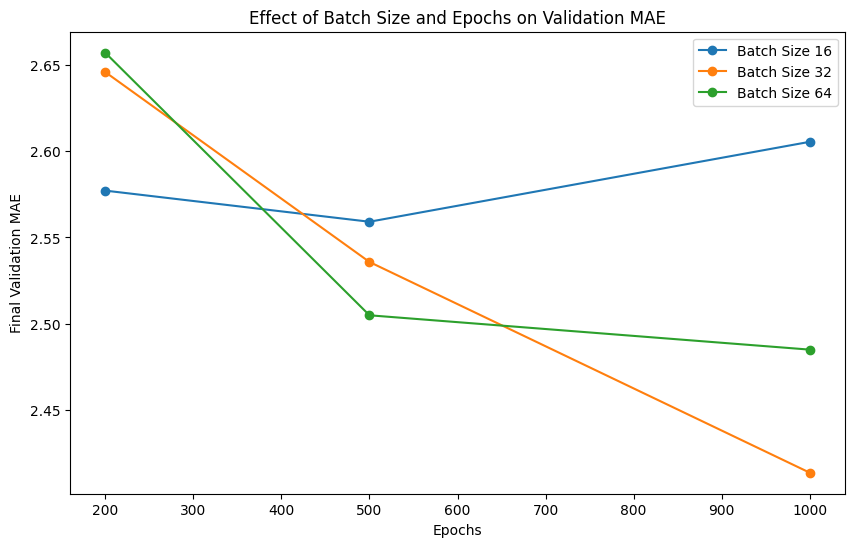

In [4]:
import matplotlib.pyplot as plt

# Define hyperparameter grids
batch_sizes = [16, 32, 64]
epochs_list = [200, 500, 1000]
results = {}

for bs in batch_sizes:
    for ep in epochs_list:
        print(f"\nTraining with Batch Size = {bs}, Epochs = {ep}")
        # Rebuild the model each time
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=[raw_x_train.shape[1]]))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(1, activation='linear'))

        model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
        history = model.fit(x_train, y_train,
                            validation_data=(x_test, y_test),
                            epochs=ep, batch_size=bs, verbose=0, shuffle=True)

        final_val_mae = history.history['val_mean_absolute_error'][-1]
        results[(bs, ep)] = final_val_mae
        print(f"Final Validation MAE: {final_val_mae:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
for bs in batch_sizes:
    mae_values = [results[(bs, ep)] for ep in epochs_list]
    plt.plot(epochs_list, mae_values, marker='o', label=f'Batch Size {bs}')
plt.xlabel('Epochs')
plt.ylabel('Final Validation MAE')
plt.title('Effect of Batch Size and Epochs on Validation MAE')
plt.legend()
plt.show()


After the training is done, we use our model to predict the price for the entire test set.

In [7]:
# Predict house prices for the entire test set
predictions = model.predict(x_test)

# Evaluate the model on the test set
test_mse, test_mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Print a few sample predictions alongside true values
print("\nSample Predictions:")
for i in range(10):
    print(f"Test Sample {i} - True Value: {y_test[i]:.2f}, Predicted Value: {predictions[i][0]:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test MSE: 12.8054
Test MAE: 2.4850

Sample Predictions:
Test Sample 0 - True Value: 7.20, Predicted Value: 7.33
Test Sample 1 - True Value: 18.80, Predicted Value: 19.01
Test Sample 2 - True Value: 19.00, Predicted Value: 20.61
Test Sample 3 - True Value: 27.00, Predicted Value: 34.35
Test Sample 4 - True Value: 22.20, Predicted Value: 25.05
Test Sample 5 - True Value: 24.50, Predicted Value: 24.28
Test Sample 6 - True Value: 31.20, Predicted Value: 29.26
Test Sample 7 - True Value: 22.90, Predicted Value: 21.93
Test Sample 8 - True Value: 20.50, Predicted Value: 20.02
Test Sample 9 - True Value: 23.20, Predicted Value: 23.27


Knowing the answers, let us check how far off you are:

In [10]:
expected = [7.939793, 18.455063, 20.115505, 32.14037]
tolerance = 0.5

for i in range(4):
    # Extract scalar using [0]
    diff = abs(predictions[i][0] - expected[i])
    assert diff < tolerance, f"Prediction for sample {i} is off by {diff:.4f}, which is more than allowed."


AssertionError: Prediction for sample 0 is off by 0.6062, which is more than allowed.

## Part II: Tuning

Improve the above results by modifying the network to include more layers with more neurons.  Also, apply L1 and L2 regularization using different weight decay parameters: Start with $\lambda=0.1$ and try $\lambda=0.2$ and $\lambda=0.3$

In [13]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define training parameters
EPOCHS = 500
BATCH_SIZE = 32

# Define hyperparameters to test
neurons_options = [64, 128]
dropout_options = [0.2, 0.3]
l2_options = [0.1, 0.2]

# Dictionary to store results for each configuration
tuning_results = {}

for neurons in neurons_options:
    for dropout_rate in dropout_options:
        for l2_reg in l2_options:
            print(f"Configuration: Neurons = {neurons}, Dropout = {dropout_rate}, L2 = {l2_reg}")

            # Build a new model for each combination
            model = Sequential()
            # First hidden layer with L2 regularization
            model.add(Dense(neurons, activation='relu',
                            input_shape=[raw_x_train.shape[1]],
                            kernel_regularizer=l2(l2_reg)))
            model.add(Dropout(dropout_rate))
            # Second hidden layer with L2 regularization
            model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_reg)))
            model.add(Dropout(dropout_rate))
            # Output layer for regression
            model.add(Dense(1, activation='linear'))

            model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])
            model.summary()

            # Train the model using the defined number of epochs and batch size
            history = model.fit(x_train, y_train,
                                validation_data=(x_test, y_test),
                                epochs=EPOCHS, batch_size=BATCH_SIZE,
                                verbose=2, shuffle=True)

            # Evaluate final validation MAE
            final_val_mae = history.history['val_mean_absolute_error'][-1]
            tuning_results[(neurons, dropout_rate, l2_reg)] = final_val_mae
            print(f"Final Validation MAE: {final_val_mae:.4f}\n")


Configuration: Neurons = 64, Dropout = 0.2, L2 = 0.1


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 - 4s - 314ms/step - loss: 559.3290 - mean_absolute_error: 21.5558 - val_loss: 561.1167 - val_mean_absolute_error: 21.5869
Epoch 2/500
13/13 - 0s - 9ms/step - loss: 504.1788 - mean_absolute_error: 20.1682 - val_loss: 496.7660 - val_mean_absolute_error: 19.9453
Epoch 3/500
13/13 - 0s - 9ms/step - loss: 428.7054 - mean_absolute_error: 18.1073 - val_loss: 413.5093 - val_mean_absolute_error: 17.7863
Epoch 4/500
13/13 - 0s - 9ms/step - loss: 342.6654 - mean_absolute_error: 15.7015 - val_loss: 308.1533 - val_mean_absolute_error: 15.1280
Epoch 5/500
13/13 - 0s - 9ms/step - loss: 238.8042 - mean_absolute_error: 12.6654 - val_loss: 198.4715 - val_mean_absolute_error: 11.7021
Epoch 6/500
13/13 - 0s - 9ms/step - loss: 147.5279 - mean_absolute_error: 9.3356 - val_loss: 111.9422 - val_mean_absolute_error: 8.3565
Epoch 7/500
13/13 - 0s - 9ms/step - loss: 90.9329 - mean_absolute_error: 6.8521 - val_loss: 74.0117 - val_mean_absolute_error: 6.2159
Epoch 8/500
13/13 - 0s - 9ms/step - lo

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 - 4s - 306ms/step - loss: 579.5842 - mean_absolute_error: 21.8805 - val_loss: 576.6702 - val_mean_absolute_error: 21.8888
Epoch 2/500
13/13 - 0s - 9ms/step - loss: 521.5501 - mean_absolute_error: 20.5498 - val_loss: 511.3947 - val_mean_absolute_error: 20.4040
Epoch 3/500
13/13 - 0s - 9ms/step - loss: 448.5415 - mean_absolute_error: 18.7904 - val_loss: 426.2502 - val_mean_absolute_error: 18.3031
Epoch 4/500
13/13 - 0s - 9ms/step - loss: 359.1891 - mean_absolute_error: 16.4711 - val_loss: 318.2210 - val_mean_absolute_error: 15.3402
Epoch 5/500
13/13 - 0s - 9ms/step - loss: 252.5419 - mean_absolute_error: 13.1017 - val_loss: 205.0703 - val_mean_absolute_error: 11.7863
Epoch 6/500
13/13 - 0s - 9ms/step - loss: 160.3775 - mean_absolute_error: 9.5720 - val_loss: 125.8119 - val_mean_absolute_error: 8.7255
Epoch 7/500
13/13 - 0s - 9ms/step - loss: 111.1601 - mean_absolute_error: 7.3479 - val_loss: 92.0127 - val_mean_absolute_error: 6.7951
Epoch 8/500
13/13 - 0s - 9ms/step - l

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 - 4s - 324ms/step - loss: 570.3785 - mean_absolute_error: 21.8391 - val_loss: 569.7547 - val_mean_absolute_error: 21.8284
Epoch 2/500
13/13 - 0s - 10ms/step - loss: 519.4467 - mean_absolute_error: 20.6022 - val_loss: 511.9620 - val_mean_absolute_error: 20.4146
Epoch 3/500
13/13 - 0s - 10ms/step - loss: 454.6852 - mean_absolute_error: 18.9770 - val_loss: 436.9189 - val_mean_absolute_error: 18.4507
Epoch 4/500
13/13 - 0s - 10ms/step - loss: 380.0202 - mean_absolute_error: 16.8264 - val_loss: 345.3617 - val_mean_absolute_error: 16.0288
Epoch 5/500
13/13 - 0s - 10ms/step - loss: 283.4075 - mean_absolute_error: 13.9091 - val_loss: 245.4052 - val_mean_absolute_error: 13.0712
Epoch 6/500
13/13 - 0s - 11ms/step - loss: 192.5963 - mean_absolute_error: 10.9512 - val_loss: 158.6314 - val_mean_absolute_error: 10.0854
Epoch 7/500
13/13 - 0s - 10ms/step - loss: 132.8117 - mean_absolute_error: 8.5724 - val_loss: 105.9855 - val_mean_absolute_error: 7.8114
Epoch 8/500
13/13 - 0s - 10m

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 - 5s - 352ms/step - loss: 580.5117 - mean_absolute_error: 21.8838 - val_loss: 571.9400 - val_mean_absolute_error: 21.7694
Epoch 2/500
13/13 - 0s - 10ms/step - loss: 522.1890 - mean_absolute_error: 20.5857 - val_loss: 511.3190 - val_mean_absolute_error: 20.4096
Epoch 3/500
13/13 - 0s - 9ms/step - loss: 459.2347 - mean_absolute_error: 19.0898 - val_loss: 435.1327 - val_mean_absolute_error: 18.5478
Epoch 4/500
13/13 - 0s - 9ms/step - loss: 382.3883 - mean_absolute_error: 17.0186 - val_loss: 340.7451 - val_mean_absolute_error: 15.9791
Epoch 5/500
13/13 - 0s - 9ms/step - loss: 282.3999 - mean_absolute_error: 14.1045 - val_loss: 236.4912 - val_mean_absolute_error: 12.7564
Epoch 6/500
13/13 - 0s - 9ms/step - loss: 192.3948 - mean_absolute_error: 10.9491 - val_loss: 150.9342 - val_mean_absolute_error: 9.5624
Epoch 7/500
13/13 - 0s - 10ms/step - loss: 131.9457 - mean_absolute_error: 8.1887 - val_loss: 102.6173 - val_mean_absolute_error: 7.2323
Epoch 8/500
13/13 - 0s - 9ms/step

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,433 (72.00 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 - 6s - 443ms/step - loss: 572.4100 - mean_absolute_error: 21.7122 - val_loss: 548.5749 - val_mean_absolute_error: 21.2442
Epoch 2/500
13/13 - 0s - 10ms/step - loss: 474.3258 - mean_absolute_error: 19.3786 - val_loss: 428.1651 - val_mean_absolute_error: 18.3208
Epoch 3/500
13/13 - 0s - 11ms/step - loss: 335.9631 - mean_absolute_error: 15.6852 - val_loss: 263.8127 - val_mean_absolute_error: 13.7751
Epoch 4/500
13/13 - 0s - 11ms/step - loss: 181.2957 - mean_absolute_error: 10.4212 - val_loss: 121.0803 - val_mean_absolute_error: 8.4998
Epoch 5/500
13/13 - 0s - 11ms/step - loss: 89.5754 - mean_absolute_error: 6.3352 - val_loss: 78.9156 - val_mean_absolute_error: 6.2117
Epoch 6/500
13/13 - 0s - 11ms/step - loss: 71.6996 - mean_absolute_error: 5.3987 - val_loss: 59.0067 - val_mean_absolute_error: 5.0801
Epoch 7/500
13/13 - 0s - 10ms/step - loss: 54.1354 - mean_absolute_error: 4.4094 - val_loss: 50.6453 - val_mean_absolute_error: 4.5078
Epoch 8/500
13/13 - 0s - 11ms/step - lo

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,433 (72.00 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 - 5s - 352ms/step - loss: 570.3257 - mean_absolute_error: 21.3391 - val_loss: 548.3420 - val_mean_absolute_error: 20.8923
Epoch 2/500
13/13 - 0s - 11ms/step - loss: 465.9644 - mean_absolute_error: 18.8163 - val_loss: 417.9179 - val_mean_absolute_error: 17.6064
Epoch 3/500
13/13 - 0s - 10ms/step - loss: 317.8406 - mean_absolute_error: 14.6963 - val_loss: 245.3331 - val_mean_absolute_error: 12.6346
Epoch 4/500
13/13 - 0s - 12ms/step - loss: 169.8783 - mean_absolute_error: 9.3589 - val_loss: 121.5803 - val_mean_absolute_error: 7.6883
Epoch 5/500
13/13 - 0s - 9ms/step - loss: 105.5995 - mean_absolute_error: 6.4475 - val_loss: 92.5187 - val_mean_absolute_error: 6.0110
Epoch 6/500
13/13 - 0s - 9ms/step - loss: 85.1696 - mean_absolute_error: 5.3548 - val_loss: 72.1132 - val_mean_absolute_error: 4.8982
Epoch 7/500
13/13 - 0s - 10ms/step - loss: 68.9364 - mean_absolute_error: 4.4111 - val_loss: 63.6985 - val_mean_absolute_error: 4.4884
Epoch 8/500
13/13 - 0s - 11ms/step - loss

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,433 (72.00 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 - 4s - 337ms/step - loss: 560.9957 - mean_absolute_error: 21.3879 - val_loss: 533.1107 - val_mean_absolute_error: 20.7727
Epoch 2/500
13/13 - 0s - 10ms/step - loss: 455.3704 - mean_absolute_error: 18.7829 - val_loss: 401.9562 - val_mean_absolute_error: 17.4687
Epoch 3/500
13/13 - 0s - 10ms/step - loss: 308.5882 - mean_absolute_error: 14.6719 - val_loss: 237.8923 - val_mean_absolute_error: 12.7408
Epoch 4/500
13/13 - 0s - 10ms/step - loss: 166.7174 - mean_absolute_error: 9.6160 - val_loss: 117.6600 - val_mean_absolute_error: 7.9932
Epoch 5/500
13/13 - 0s - 10ms/step - loss: 96.3006 - mean_absolute_error: 6.7309 - val_loss: 87.8827 - val_mean_absolute_error: 6.3513
Epoch 6/500
13/13 - 0s - 11ms/step - loss: 81.3958 - mean_absolute_error: 5.8771 - val_loss: 64.1146 - val_mean_absolute_error: 5.2544
Epoch 7/500
13/13 - 0s - 10ms/step - loss: 58.7558 - mean_absolute_error: 4.7150 - val_loss: 54.0000 - val_mean_absolute_error: 4.6971
Epoch 8/500
13/13 - 0s - 10ms/step - los

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,433 (72.00 KB)

 Trainable params: 18,433 (72.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
13/13 - 4s - 333ms/step - loss: 598.4425 - mean_absolute_error: 22.0015 - val_loss: 572.9164 - val_mean_absolute_error: 21.4960
Epoch 2/500
13/13 - 0s - 10ms/step - loss: 507.6277 - mean_absolute_error: 19.8667 - val_loss: 471.0314 - val_mean_absolute_error: 19.0610
Epoch 3/500
13/13 - 0s - 10ms/step - loss: 390.9819 - mean_absolute_error: 16.8221 - val_loss: 329.5589 - val_mean_absolute_error: 15.2169
Epoch 4/500
13/13 - 0s - 10ms/step - loss: 249.2815 - mean_absolute_error: 12.5426 - val_loss: 181.6303 - val_mean_absolute_error: 10.2759
Epoch 5/500
13/13 - 0s - 10ms/step - loss: 144.1179 - mean_absolute_error: 8.0736 - val_loss: 112.6470 - val_mean_absolute_error: 7.0606
Epoch 6/500
13/13 - 0s - 10ms/step - loss: 113.5249 - mean_absolute_error: 6.8794 - val_loss: 90.0539 - val_mean_absolute_error: 6.1625
Epoch 7/500
13/13 - 0s - 10ms/step - loss: 87.3240 - mean_absolute_error: 5.5789 - val_loss: 75.9381 - val_mean_absolute_error: 5.3468
Epoch 8/500
13/13 - 0s - 11ms/step 

Retry the above using dropout regularization.  What do you notice?

Repeat the above by trying multiple parameter combinations:
- Using a combination of 64 to 128 neurons
- Using Dropout of 0.2 and 0.3
- Using L2 = 0.1 and 0.2

For each case, print first 4 predictions and record the answers!

In [14]:
print("First 4 predictions for the current configuration:")
for i in range(4):
    print("Prediction:", predictions[i, 0], ", true value:", y_test[i])


First 4 predictions for the current configuration:
Prediction: 7.3336234 , true value: 7.2
Prediction: 19.006283 , true value: 18.8
Prediction: 20.608332 , true value: 19.0
Prediction: 34.35245 , true value: 27.0
